In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/70k-job-applicants-data-human-resource/stackoverflow_full.csv


# Data Preprocessing

## Read the dataset and save it as a dataframe

In [2]:
# Read an excel spreadsheet into a pandas dataframe
df = pd.read_csv("/kaggle/input/70k-job-applicants-data-human-resource/stackoverflow_full.csv")

# Print the first 5 rows
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [3]:
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


## Clean data

In [4]:
# Remove unnamed column
df.drop(columns = 'Unnamed: 0', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 7.8+ MB


In [6]:
df.shape

(73462, 14)

In [7]:
df.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [8]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [9]:
# Check for missing values and count them for each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [10]:
# Drop the column that has many null values, plus the computer skills column has inferred it; plus it has multiple values
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  ComputerSkills  73462 non-null  int64  
 12  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 7.3+ MB


In [12]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,0


In [13]:
# Check for missing values and count them for each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
ComputerSkills    0
Employed          0
dtype: int64


In [14]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
ComputerSkills      int64
Employed            int64
dtype: object

In [15]:
df.nunique()

Age                   2
Accessibility         2
EdLevel               5
Employment            2
Gender                3
MentalHealth          2
MainBranch            2
YearsCode            51
YearsCodePro         51
Country             172
PreviousSalary    12062
ComputerSkills       73
Employed              2
dtype: int64

# Exploratory Data Analysis

## Check for class imbalance and sampling

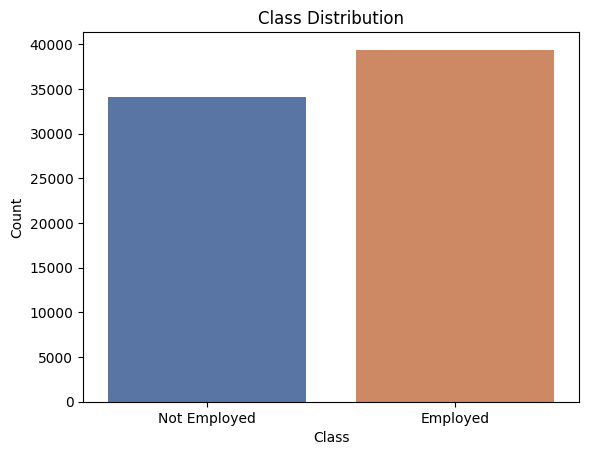

In [16]:
# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df['Employed'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values, palette="deep")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Not Employed', 'Employed'])  # Adjust labels if necessary
plt.show()

In [17]:
# Calculate the proportions
df['Employed'].value_counts(normalize=True)

Employed
1    0.536223
0    0.463777
Name: proportion, dtype: float64

The dataset seems relatively balanced because the counts for the two classes ("Not Employed" and "Employed") appear close to each other, no class outweights the other one.

## Univariate Analysis

### Categorical Features

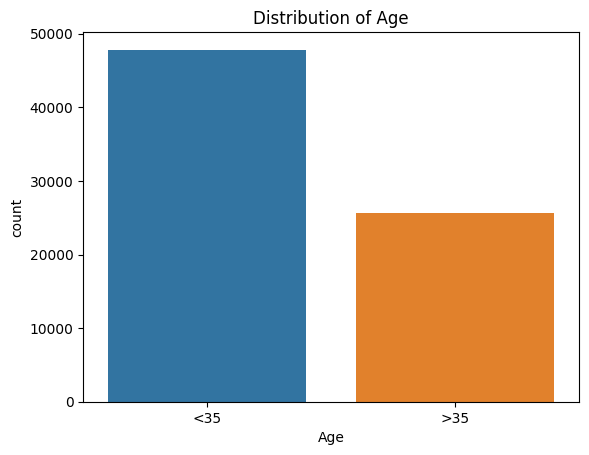

In [18]:
sns.countplot(data=df, x='Age')
plt.title('Distribution of Age')
plt.show()

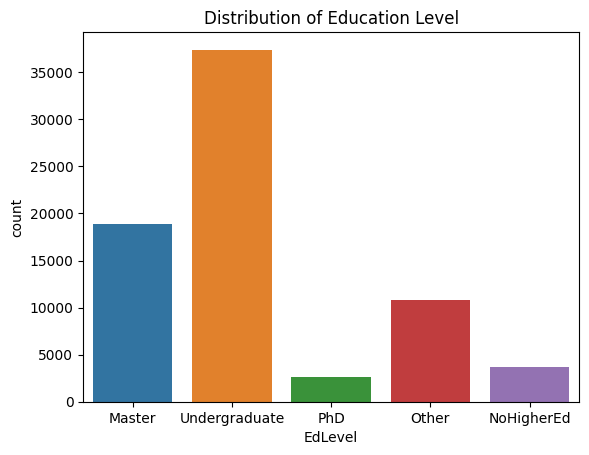

In [19]:
sns.countplot(data=df, x='EdLevel')
plt.title('Distribution of Education Level')
plt.show()

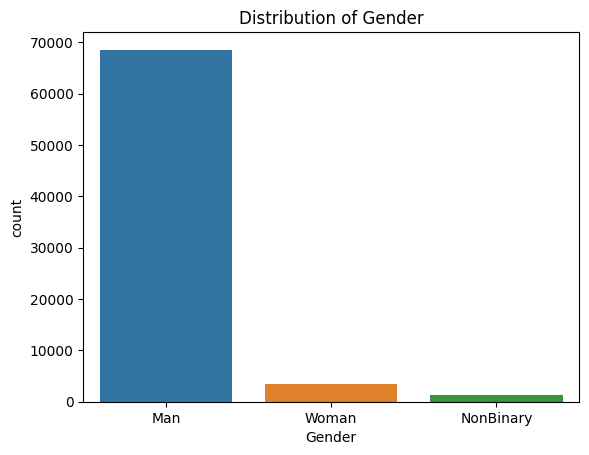

In [20]:
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.show()

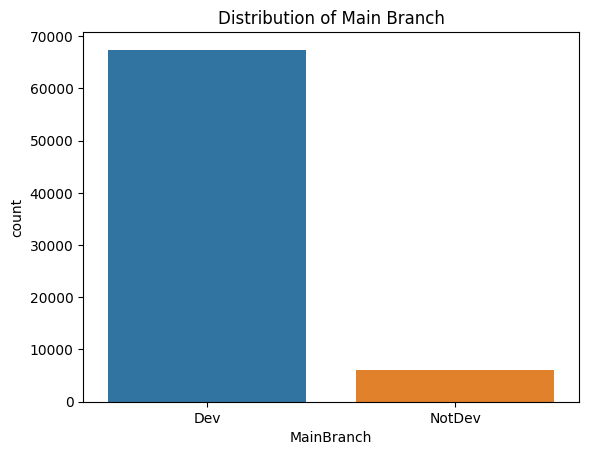

In [21]:
sns.countplot(data=df, x='MainBranch')
plt.title('Distribution of Main Branch')
plt.show()

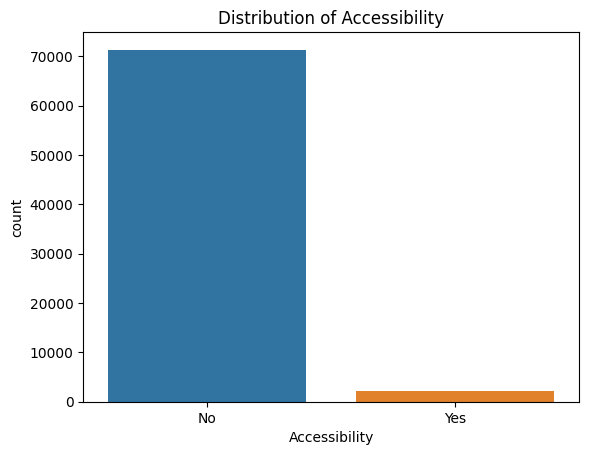

In [22]:
sns.countplot(data=df, x='Accessibility')
plt.title('Distribution of Accessibility')
plt.show()

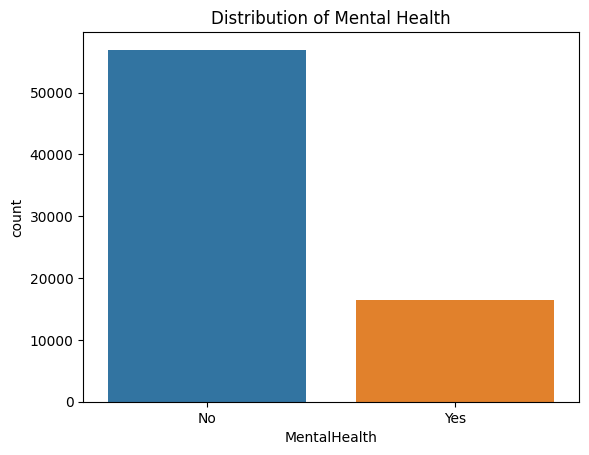

In [23]:
sns.countplot(data=df, x='MentalHealth')
plt.title('Distribution of Mental Health')
plt.show()

### Numerical Features

In [24]:
def annotate_bins(ax, annotate_type='count', fontsize=10, offset=1):
    """
    Annotates a histogram with counts or bin ranges.

    Parameters:
    - ax: Matplotlib Axes object (the result of sns.histplot or plt.hist).
    - annotate_type: 'count' to annotate with bin counts, 'range' for bin ranges.
    - fontsize: Font size of the annotations.
    - offset: Vertical offset for the annotations above the bars.
    """
    for bar in ax.patches:  # Loop through each bar in the histogram
        height = bar.get_height()  # Height of the bar (count)
        x_center = bar.get_x() + bar.get_width() / 2  # Center of the bar
        
        if annotate_type == 'count':
            # Annotate with the count in the bin
            ax.text(x_center, height + offset, f"{int(height)}", 
                    ha='center', va='bottom', fontsize=fontsize)
        elif annotate_type == 'range':
            # Annotate with the bin range
            bin_start = bar.get_x()  # Start of the bin
            bin_end = bar.get_x() + bar.get_width()  # End of the bin
            ax.text(x_center, height + offset, f"[{bin_start:.1f}, {bin_end:.1f}]", 
                    ha='center', va='bottom', fontsize=fontsize)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


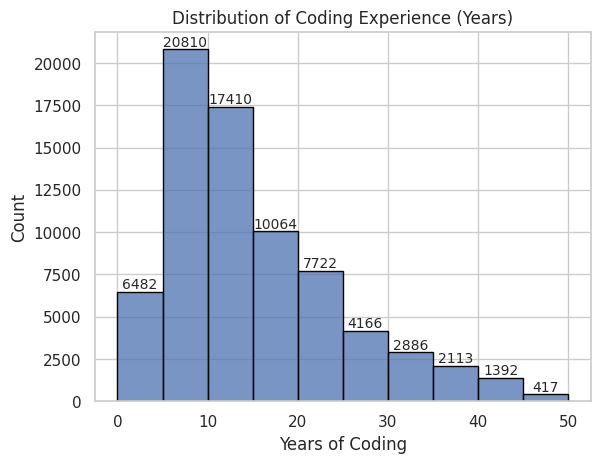

In [25]:
# Example data
sns.set(style="whitegrid")
ax = sns.histplot(df['YearsCode'], bins=10, edgecolor='black')  # Add edgecolor for better visual distinction

# Annotate each bin
annotate_bins(ax, annotate_type='count')

# Display
plt.title("Distribution of Coding Experience (Years)")
plt.xlabel("Years of Coding")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


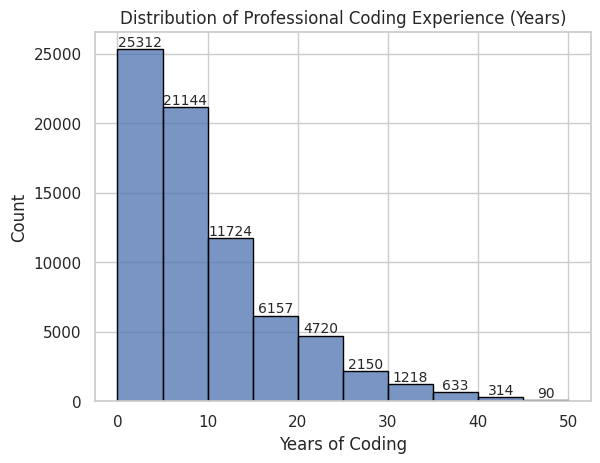

In [26]:
# Example data
sns.set(style="whitegrid")
ax = sns.histplot(df['YearsCodePro'], bins=10, edgecolor='black')  # Add edgecolor for better visual distinction

# Annotate each bin
annotate_bins(ax, annotate_type='count')

# Display
plt.title("Distribution of Professional Coding Experience (Years)")
plt.xlabel("Years of Coding")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


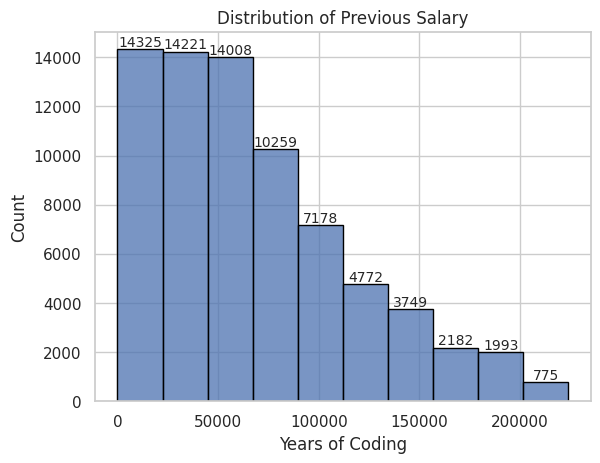

In [27]:
# Example data
sns.set(style="whitegrid")
ax = sns.histplot(df['PreviousSalary'], bins=10, edgecolor='black')  # Add edgecolor for better visual distinction

# Annotate each bin
annotate_bins(ax, annotate_type='count')

# Display
plt.title("Distribution of Previous Salary")
plt.xlabel("Years of Coding")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


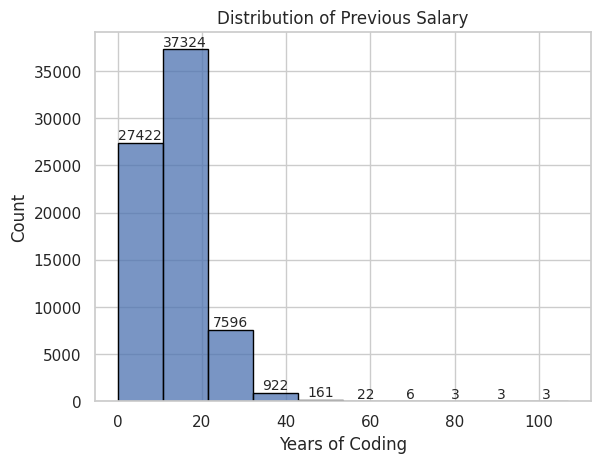

In [28]:
# Example data
sns.set(style="whitegrid")
ax = sns.histplot(df['ComputerSkills'], bins=10, edgecolor='black')  # Add edgecolor for better visual distinction

# Annotate each bin
annotate_bins(ax, annotate_type='count')

# Display
plt.title("Distribution of Previous Salary")
plt.xlabel("Years of Coding")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

### Target Variable vs. Features

#### Categorical Variables

In [29]:
def annotate_bars(ax, fontsize=10, offset=1):
    """
    Annotates each bar in a bar chart with its height (count).

    Parameters:
    - ax: Matplotlib Axes object (result of sns.countplot or similar).
    - fontsize: Font size of the annotations.
    - offset: Vertical offset for the annotations above the bars.
    """
    for bar in ax.patches:  # Loop through each bar in the chart
        height = bar.get_height()  # Height of the bar (count)
        if height > 0:  # Avoid annotating bars with zero height
            x_center = bar.get_x() + bar.get_width() / 2  # Center of the bar
            ax.text(x_center, height + offset, f"{int(height)}", 
                    ha='center', va='bottom', fontsize=fontsize)

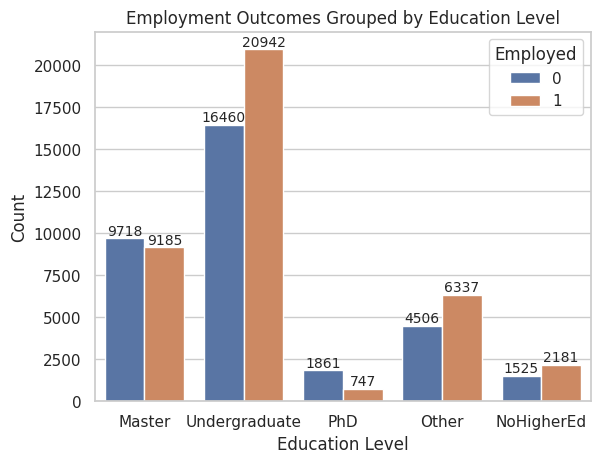

In [30]:
# Plot
ax = sns.countplot(data=df, x='EdLevel', hue='Employed')

# Annotate the bars
annotate_bars(ax, fontsize=10)

# Show
plt.title("Employment Outcomes Grouped by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Employed")
plt.show()

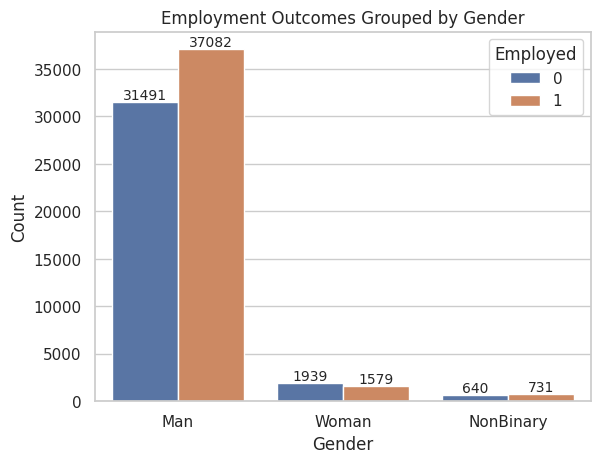

In [31]:
# Plot
ax = sns.countplot(data=df, x='Gender', hue='Employed')

# Annotate the bars
annotate_bars(ax, fontsize=10)

# Show
plt.title("Employment Outcomes Grouped by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Employed")
plt.show()

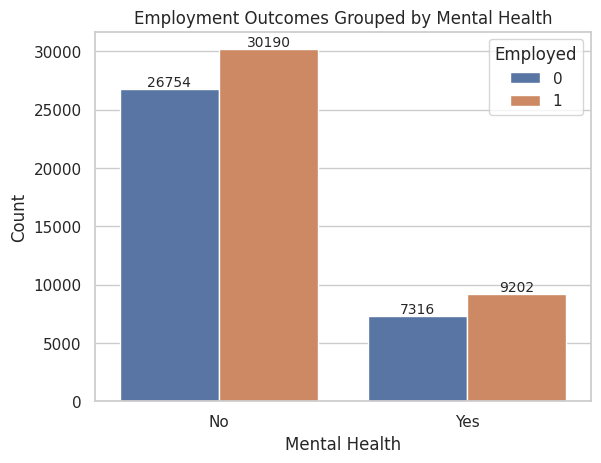

In [32]:
# Plot
ax = sns.countplot(data=df, x='MentalHealth', hue='Employed')

# Annotate the bars
annotate_bars(ax, fontsize=10)

# Show
plt.title("Employment Outcomes Grouped by Mental Health")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.legend(title="Employed")
plt.show()

#### Numerical Variables

In [33]:
def annotate_boxplot(ax, data, x, y, metric='median', fontsize=10, offset=500):
    """
    Annotates a boxplot with specified metrics (e.g., median, mean).

    Parameters:
    - ax: Matplotlib Axes object (result of sns.boxplot).
    - data: The original DataFrame used for the boxplot.
    - x: The column on the x-axis (categorical variable).
    - y: The column on the y-axis (numerical variable).
    - metric: Metric to annotate ('median' or 'mean').
    - fontsize: Font size of the annotations.
    - offset: Vertical offset for the annotations above the box.
    """
    categories = data[x].unique()  # Get unique categories on the x-axis

    for i, category in enumerate(categories):
        # Filter data for the current category
        category_data = data[data[x] == category][y]

        if metric == 'median':
            value = category_data.median()  # Calculate median
        elif metric == 'mean':
            value = category_data.mean()  # Calculate mean
        else:
            raise ValueError("Unsupported metric. Use 'median' or 'mean'.")

        # Annotate the value on the plot
        ax.text(i, value + offset, f"{value:.2f}", ha='center', fontsize=fontsize, color='black')


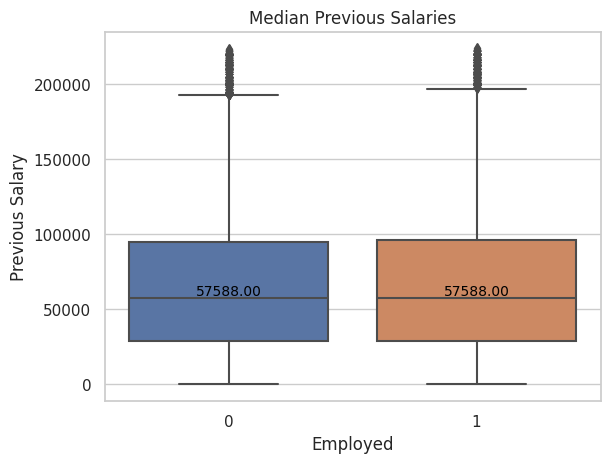

In [34]:
# Create a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Employed', y='PreviousSalary')

# Annotate the boxplot
annotate_boxplot(ax, data=df, x='Employed', y='PreviousSalary', metric='median', offset=2000)

# Show
plt.title("Median Previous Salaries")
plt.xlabel("Employed")
plt.ylabel("Previous Salary")
plt.show()

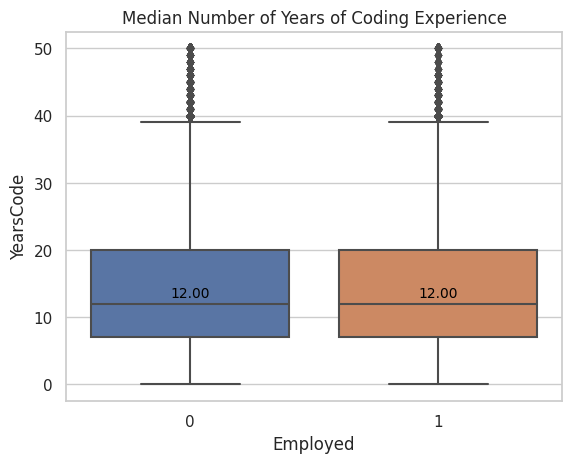

In [35]:
# Create a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Employed', y='YearsCode')

# Annotate the boxplot
annotate_boxplot(ax, data=df, x='Employed', y='YearsCode', metric='median', offset=1)

# Show
plt.title("Median Number of Years of Coding Experience")
plt.xlabel("Employed")
plt.ylabel("YearsCode")
plt.show()

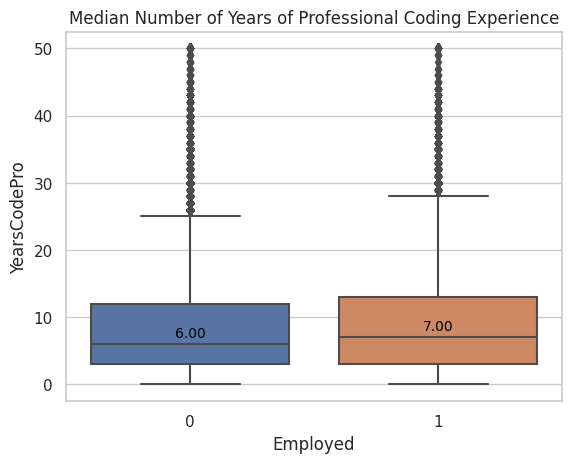

In [36]:
# Create a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Employed', y='YearsCodePro')

# Annotate the boxplot
annotate_boxplot(ax, data=df, x='Employed', y='YearsCodePro', metric='median', offset=1)

# Show
plt.title("Median Number of Years of Professional Coding Experience")
plt.xlabel("Employed")
plt.ylabel("YearsCodePro")
plt.show()

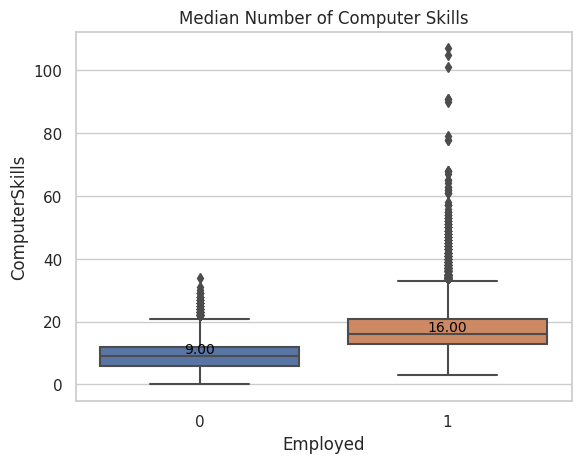

In [37]:
# Create a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Employed', y='ComputerSkills')

# Annotate the boxplot
annotate_boxplot(ax, data=df, x='Employed', y='ComputerSkills', metric='median', offset=1)

# Show
plt.title("Median Number of Computer Skills")
plt.xlabel("Employed")
plt.ylabel("ComputerSkills")
plt.show()

#### Continents

In [38]:
def segment_country(country):
    if country in set(['United States of America', 'Canada', 'Mexico']):
        return 'NorthAmerica'
    elif country in set(['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']):
        return 'Europe'
    elif country in set(['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']):
        return 'South America'
    elif country in set(['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']):
        return 'Asia'
    elif country in set(['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']):
        return 'Australia'
    else:
        return 'Others'

In [39]:
# Create a new column 'Continent'
df['Continent'] = df['Country'].apply(segment_country)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,0,NorthAmerica
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,0,Asia


In [40]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

In [41]:
continent_counts = df['Continent'].value_counts()
continent_counts

Continent
Europe           28221
NorthAmerica     18209
Others           11220
Asia              9457
South America     4258
Australia         2097
Name: count, dtype: int64

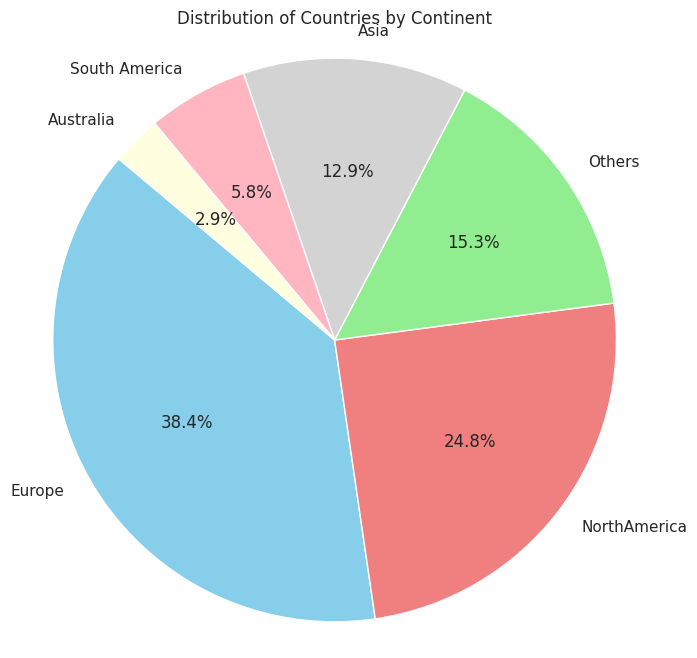

In [42]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

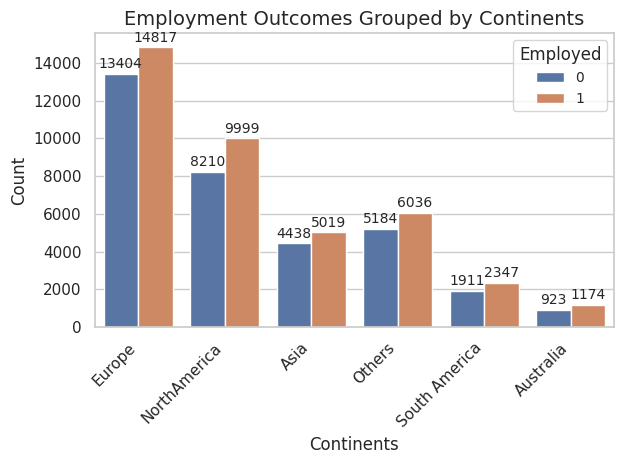

In [43]:
# Plot
ax = sns.countplot(data=df, x='Continent', hue='Employed')

# Annotate the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title("Employment Outcomes Grouped by Continents", fontsize=14)
plt.xlabel("Continents", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize legend
plt.legend(title="Employed", fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Correlation Heatmap

In [44]:
# Create a copy of the original dataframe
df_copy = df.copy()

# Label encode categorical columns
label_encoder = LabelEncoder()
# categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent']
categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country', 'Continent']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df[col])

In [45]:
correlation_matrix = df_copy.corr()
correlation_matrix

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,Continent
Age,1.000000,0.015830,-0.090293,-0.070501,-0.037537,-0.015928,0.087110,0.677317,0.689494,0.085452,0.322377,-0.060769,-0.030257,0.066432
Accessibility,0.015830,1.000000,0.001067,-0.015911,0.029551,0.107685,0.004746,0.030686,0.028398,0.007660,-0.015215,0.022160,0.010659,0.018505
EdLevel,-0.090293,0.001067,1.000000,0.050759,0.004035,0.046803,-0.048520,-0.093978,-0.073471,0.067756,-0.013832,0.031123,0.045255,-0.000778
Employment,-0.070501,-0.015911,0.050759,1.000000,0.014295,0.010353,-0.009984,-0.080691,-0.092917,0.059530,0.036980,-0.037904,-0.012142,-0.020745
Gender,-0.037537,0.029551,0.004035,0.014295,1.000000,0.104701,0.015908,-0.068795,-0.067474,0.039619,-0.007945,-0.045627,-0.038059,0.006803
MentalHealth,-0.015928,0.107685,0.046803,0.010353,0.104701,1.000000,0.004745,-0.011516,-0.032900,0.085804,0.067935,0.034587,0.022536,0.069702
MainBranch,0.087110,0.004746,-0.048520,-0.009984,0.015908,0.004745,1.000000,0.049615,0.025885,0.004836,0.006075,-0.098698,-0.112736,-0.002007
YearsCode,0.677317,0.030686,-0.093978,-0.080691,-0.068795,-0.011516,0.049615,1.000000,0.901073,0.086695,0.390855,-0.020460,-0.003756,0.046204
YearsCodePro,0.689494,0.028398,-0.073471,-0.092917,-0.067474,-0.032900,0.025885,0.901073,1.000000,0.084860,0.393615,-0.012838,0.002886,0.063352
Country,0.085452,0.007660,0.067756,0.059530,0.039619,0.085804,0.004836,0.086695,0.084860,1.000000,0.353216,-0.004377,0.008247,0.081419


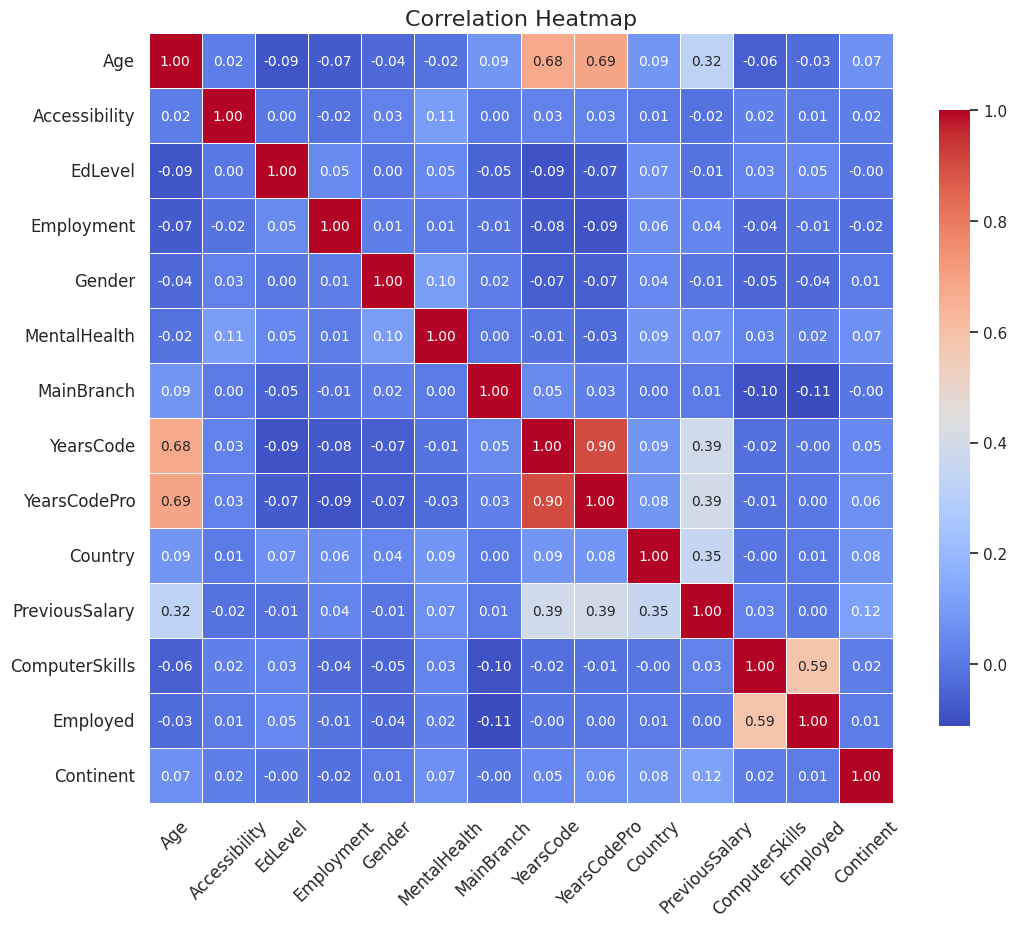

In [46]:
# Create a heatmap
# Create a heatmap with more visible annotations
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
sns.heatmap(
    correlation_matrix, 
    annot=True,              # Show correlation coefficients
    annot_kws={"size": 10},  # Set font size for annotations
    linewidths=0.5,          # Add space between cells
    fmt=".2f",               # Limit numbers to 2 decimal places
    cmap="coolwarm",         # Use a diverging colormap for better contrast
    cbar_kws={'shrink': 0.8} # Shrink colorbar for better fit
)
plt.title('Correlation Heatmap', fontsize=16)  # Larger title
plt.xticks(fontsize=12, rotation=45)  # Adjust x-axis labels
plt.yticks(fontsize=12, rotation=0)   # Adjust y-axis labels
plt.show()

# Models

## Create a train-test split

In [47]:
# Step 1: Define features and target variable
X = df_copy.drop("Employed", axis=1)  # Features (all columns except 'Employed')
y = df_copy["Employed"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 58769
Testing set size: 14693


In [49]:
X_train.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Continent
32178,0,0,2,1,0,0,0,25,15,164,138000.0,21,3
18457,1,0,0,1,0,0,0,14,11,67,25656.0,8,4
47849,0,0,4,1,0,0,0,5,2,11,3408.0,10,0
59358,0,0,4,1,0,0,0,8,5,164,72500.0,16,3
37397,0,0,4,1,0,0,0,11,7,7,57790.0,16,1


In [50]:
y_train.head()

32178    1
18457    1
47849    0
59358    1
37397    1
Name: Employed, dtype: int64

In [51]:
X_test.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Continent
31363,0,0,4,1,0,0,0,9,1,65,7372.0,26,0
50414,1,0,4,1,0,0,0,20,14,27,77303.0,18,3
55640,1,0,1,0,0,0,0,35,31,54,89580.0,5,2
52376,1,0,4,1,0,0,0,30,32,29,200000.0,27,5
12724,1,0,0,1,0,0,0,30,21,126,28308.0,7,4


In [52]:
y_test.head()

31363    1
50414    1
55640    0
52376    1
12724    1
Name: Employed, dtype: int64

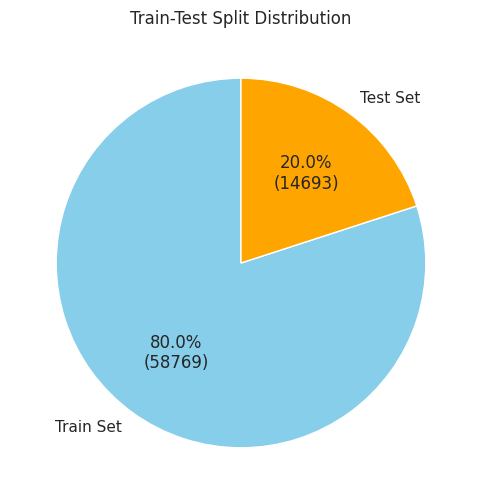

In [53]:
# Calculate the sizes of the train and test sets
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

# Data for visualization
labels = ['Train Set', 'Test Set']
sizes = [train_size, test_size]
percentages = [f'{(train_size / total_size) * 100:.1f}%', f'{(test_size / total_size) * 100:.1f}%']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * total_size / 100)})', startangle=90, colors=['skyblue', 'orange'])
plt.title('Train-Test Split Distribution')
plt.show()

## Model fitting

### Logistic Regression

In [54]:
# Create a Logistic Regression classifier
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_test)

In [55]:
# Calculate the Accuracy and AUC scores
lr_y_scores = lr_clf.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_scores)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_auc = auc(lr_fpr, lr_tpr)

# Print the Accuracy and AUC scores
print(f'Logistic Regression - Accuracy: {lr_accuracy:.4f}')
print(f'Logistic Regression - AUC: {lr_auc:.4f}')

Logistic Regression - Accuracy: 0.7376
Logistic Regression - AUC: 0.8190


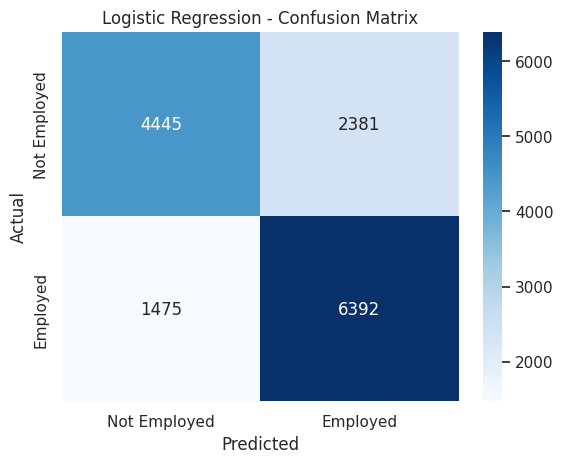

In [56]:
# Plot the confusion matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
plt.figure()
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

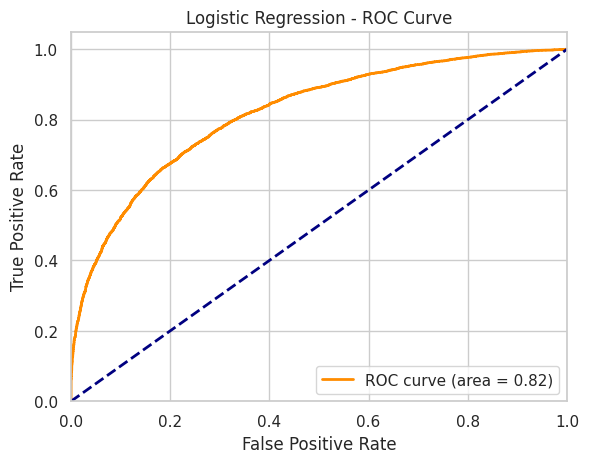

In [57]:
# Plot the ROC curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Classifier

In [58]:
# Create a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

In [59]:
# Calculate the Accuracy and AUC scores
dt_y_scores = dt_clf.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_scores)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_auc = auc(dt_fpr, dt_tpr)

# Print the Accuracy and AUC scores
print(f'Decision Tree - Accuracy: {dt_accuracy:.4f}')
print(f'Decision Tree - AUC: {dt_auc:.4f}')

Decision Tree - Accuracy: 0.7135
Decision Tree - AUC: 0.7127


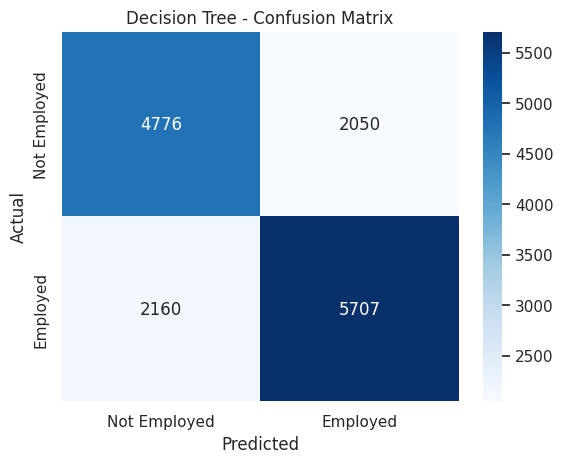

In [60]:
# Plot the confusion matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure()
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

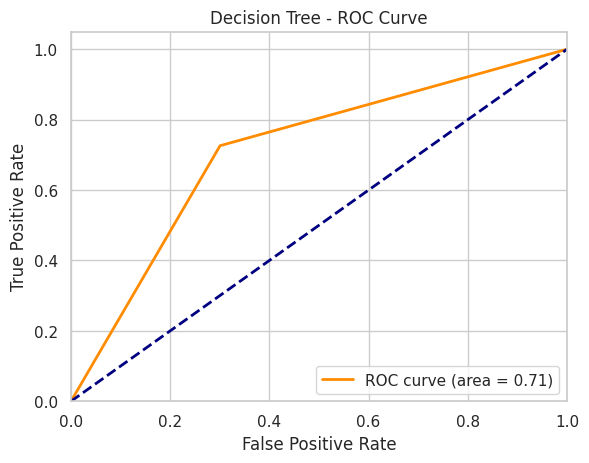

In [61]:
# Plot the ROC curve
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [62]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # No maximum depth (trees grow until all leaves are pure or min_samples_split is reached)
    random_state=42,   # For reproducibility
    class_weight='balanced'  # Handle imbalanced data by weighting classes inversely to their frequency
)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

In [63]:
# Calculate the Accuracy and AUC scores
rf_y_scores = rf_clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_scores)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_auc = auc(rf_fpr, rf_tpr)

# Print the Accuracy and AUC scores
print(f'Random Forest - Accuracy: {rf_accuracy:.4f}')
print(f'Random Forest - AUC: {rf_auc:.4f}')

Random Forest - Accuracy: 0.7766
Random Forest - AUC: 0.8603


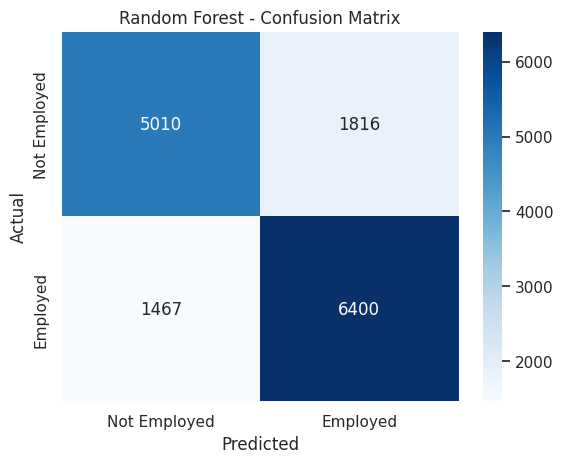

In [64]:
# Plot the confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure()
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

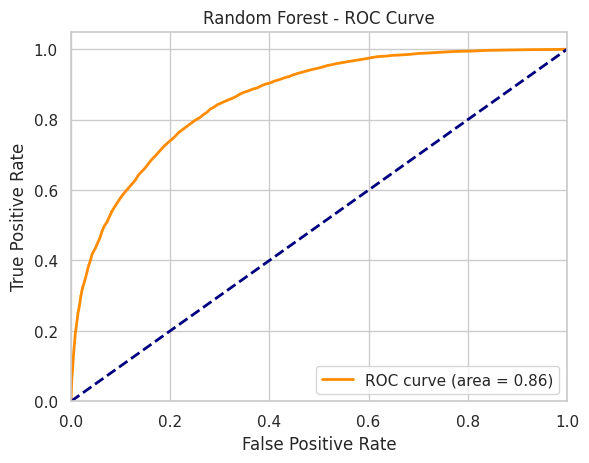

In [65]:
# Plot the ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost

In [66]:
# Create a XGBoost classifier
xgb_clf = XGBClassifier(
    n_estimators=100,       # Number of boosting rounds (trees)
    max_depth=5,            # Maximum tree depth to prevent overfitting
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of features for each tree
    scale_pos_weight=1,     # For imbalanced datasets, adjust class weighting
    random_state=42,        # Reproducibility
    use_label_encoder=False # Suppresses label encoder warnings
)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

In [67]:
# Calculate the AUC
xgb_y_scores = xgb_clf.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_scores)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Print AUC
print(f'XGBoost - Accuracy: {xgb_accuracy:.4f}')
print(f'XGBoost - AUC: {xgb_auc:.4f}')

XGBoost - Accuracy: 0.7911
XGBoost - AUC: 0.8753


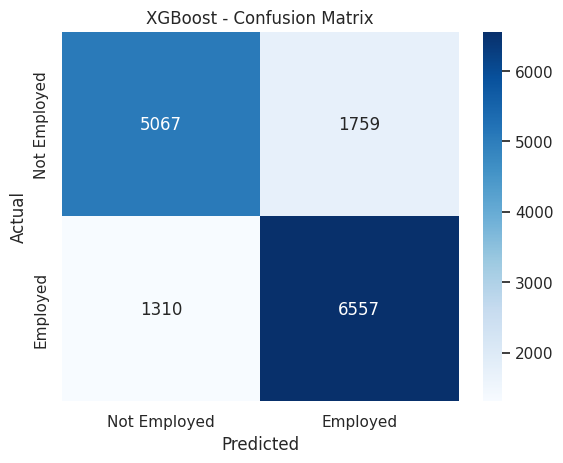

In [68]:
# Plot the confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure()
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

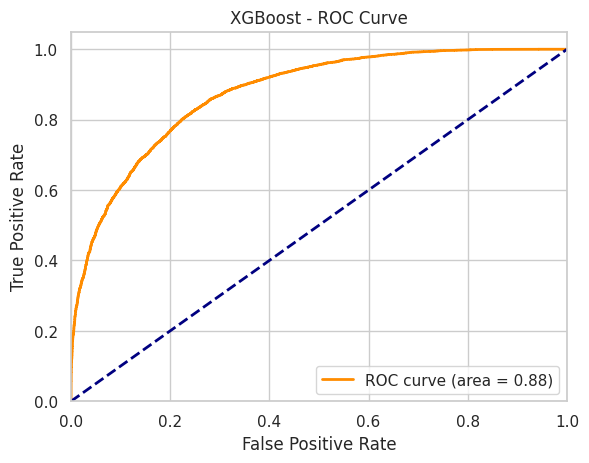

In [69]:
# Plot the ROC curve
plt.figure()
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### LightGBM

In [70]:
# Create a LightGBM classifier
lgbm_clf = LGBMClassifier(
    n_estimators=100,          # Number of boosting rounds
    max_depth=5,               # Maximum tree depth to prevent overfitting
    num_leaves=31,
    learning_rate=0.1,         # Step size shrinkage
    subsample=0.8,             # Subsample ratio of training instances
    colsample_bytree=0.8,      # Subsample ratio of features for each tree
    scale_pos_weight=1,        # Adjusts weight for imbalanced datasets
    random_state=42            # For reproducibility
)
lgbm_clf.fit(X_train, y_train)
lgbm_y_pred = lgbm_clf.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 31525, number of negative: 27244
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 58769, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536422 -> initscore=0.145948
[LightGBM] [Info] Start training from score 0.145948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [71]:
# Calculate the Accuracy and AUC scores
lgbm_y_scores = lgbm_clf.predict_proba(X_test)[:, 1]
lgbm_fpr, lgbm_tpr, lgbm_thresholds = roc_curve(y_test, lgbm_y_scores)
lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

# Print the Accuracy and AUC scores
print(f'LightGBM - Accuracy: {lgbm_accuracy:.4f}')
print(f'LightGBM - AUC: {lgbm_auc:.4f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM - Accuracy: 0.7925
LightGBM - AUC: 0.8750


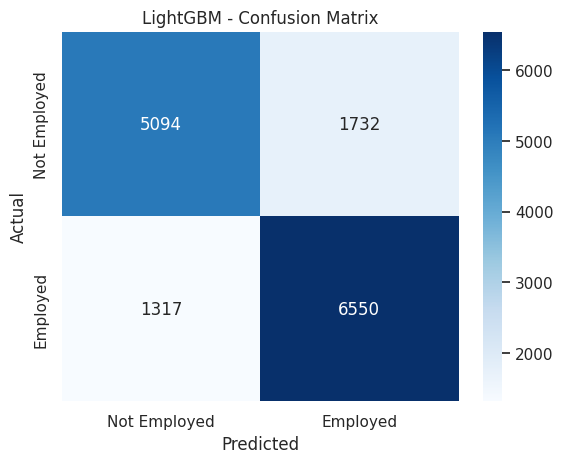

In [72]:
# Plot the confusion matrix
lgbm_cm = confusion_matrix(y_test, lgbm_y_pred)
plt.figure()
sns.heatmap(lgbm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM - Confusion Matrix')
plt.show()

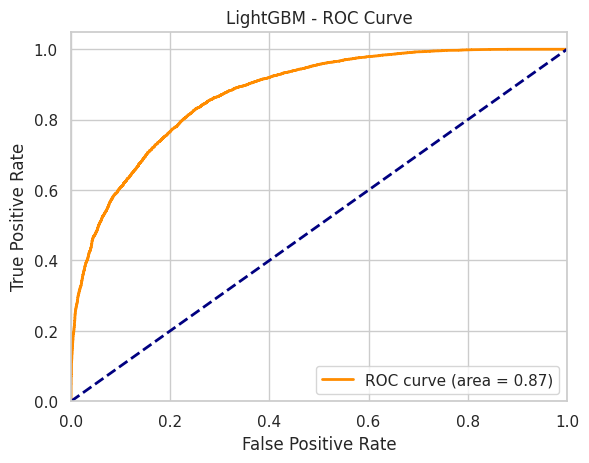

In [73]:
# Plot the ROC curve
plt.figure()
plt.plot(lgbm_fpr, lgbm_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {lgbm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Shallow Neural Network

In [74]:
# Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Define the Shallow Neural Network
snn_clf = Sequential([
    Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer and hidden layer
    Dropout(0.2),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# Compile the model
snn_clf.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

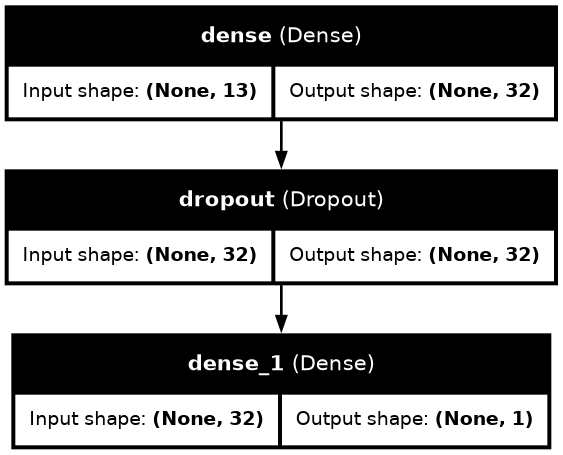

In [77]:
# Visualize the architecture
plot_model(
    snn_clf, 
    to_file='snn_architecture.png',  # Save the architecture as an image file
    show_shapes=True,  # Display the shapes of the layers
    show_layer_names=True,  # Display the layer names
    dpi=96  # Adjust resolution
)

# Display the saved image (optional if running in a Jupyter Notebook)
Image('snn_architecture.png')

In [78]:
# Train the model
history = snn_clf.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=50,             # Number of training iterations
    batch_size=32,         # Number of samples per batch
    verbose=1              # Print training progress
)

# Evaluate the model on the test set
snn_y_scores = snn_clf.predict(X_test_scaled).flatten()  # Predicted probabilities
snn_y_pred = (snn_y_scores >= 0.5).astype(int)  # Convert probabilities to binary predictions

Epoch 1/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6957 - loss: 0.5646 - val_accuracy: 0.7829 - val_loss: 0.4480
Epoch 2/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7798 - loss: 0.4540 - val_accuracy: 0.7854 - val_loss: 0.4457
Epoch 3/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7810 - loss: 0.4485 - val_accuracy: 0.7853 - val_loss: 0.4431
Epoch 4/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7820 - loss: 0.4508 - val_accuracy: 0.7855 - val_loss: 0.4429
Epoch 5/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7854 - loss: 0.4439 - val_accuracy: 0.7865 - val_loss: 0.4427
Epoch 6/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7880 - loss: 0.4415 - val_accuracy: 0.7855 - val_loss: 0.4423
Epoch 7/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7856 - loss: 0.4406 - val_accuracy: 0.7865 - val_loss: 0.4415
Epoch 8/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7821 - loss: 0.4452 - 

In [79]:
# Calculate the Accuracy and AUC scores
snn_accuracy = accuracy_score(y_test, snn_y_pred)
snn_auc = roc_auc_score(y_test, snn_y_scores)

# Print the Accuracy and AUC scores
print(f'Shallow Neural Network - Accuracy:, {snn_accuracy:.4f}')
print(f'Shallow Neural Network - AUC: {snn_auc:.4f}')
print("\nClassification Report:\n", classification_report(y_test, snn_y_pred))

Shallow Neural Network - Accuracy:, 0.7905
Shallow Neural Network - AUC: 0.8739

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      6826
           1       0.79      0.83      0.81      7867

    accuracy                           0.79     14693
   macro avg       0.79      0.79      0.79     14693
weighted avg       0.79      0.79      0.79     14693



In [80]:
# Calculate the AUC
snn_fpr, snn_tpr, snn_thresholds = roc_curve(y_test, snn_y_scores)
snn_auc = auc(snn_fpr, snn_tpr)

# Print AUC
print(f'Shallow Neural Network - AUC: {snn_auc:.4f}')

Shallow Neural Network - AUC: 0.8739


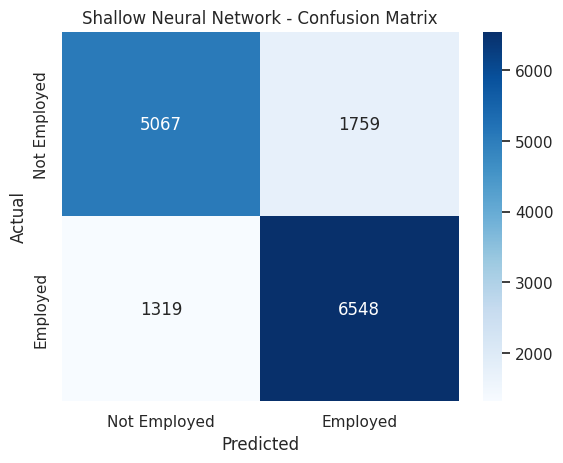

In [81]:
# Plot the confusion matrix
snn_cm = confusion_matrix(y_test, snn_y_pred)
plt.figure()
sns.heatmap(snn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Shallow Neural Network - Confusion Matrix')
plt.show()

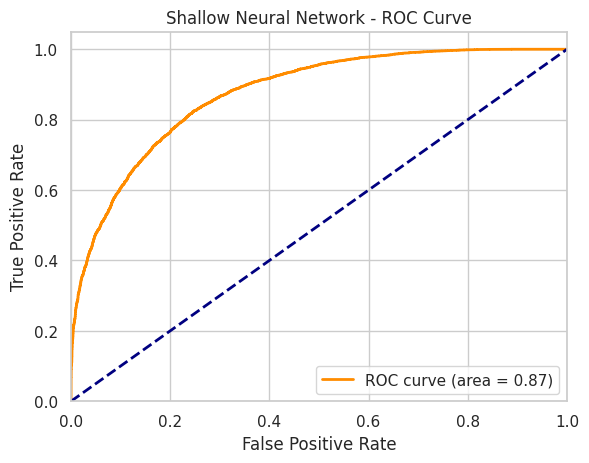

In [82]:
# Plot the ROC curve
plt.figure()
plt.plot(snn_fpr, snn_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {snn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Shallow Neural Network - ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Meta-Learning - Stack Classifier

In [83]:
# Define base models
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False))
]

# Define stacking classifier
stack_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5  # Cross-validation for stacking
)

# Train and evaluate
stack_clf.fit(X_train, y_train)
stack_y_pred = stack_clf.predict(X_test)

In [84]:
# Metrics
stack_y_scores = stack_clf.predict_proba(X_test)[:, 1]
stack_accuracy = accuracy_score(y_test, stack_y_pred)
stack_auc = roc_auc_score(y_test, stack_y_scores)

# Print AUC
print(f'Stack Classifier - Accuracy:, {stack_accuracy:.4f}')
print(f'Stack Classifier - AUC: {stack_auc:.4f}')
print("\nClassification Report:\n", classification_report(y_test, stack_y_pred))

Stack Classifier - Accuracy:, 0.7874
Stack Classifier - AUC: 0.8735

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      6826
           1       0.79      0.82      0.81      7867

    accuracy                           0.79     14693
   macro avg       0.79      0.78      0.79     14693
weighted avg       0.79      0.79      0.79     14693



In [85]:
# Calculate the Accuracy and AUC scores
stack_fpr, stack_tpr, stack_thresholds = roc_curve(y_test, stack_y_scores)
stack_accuracy = accuracy_score(y_test, stack_y_pred)
stack_auc = auc(stack_fpr, stack_tpr)

# Print the Accuracy and AUC scores
print(f'Stack Ensemble - Accuracy: {stack_accuracy:.4f}')
print(f'Stack Ensemble - AUC: {stack_auc:.4f}')

Stack Ensemble - Accuracy: 0.7874
Stack Ensemble - AUC: 0.8735


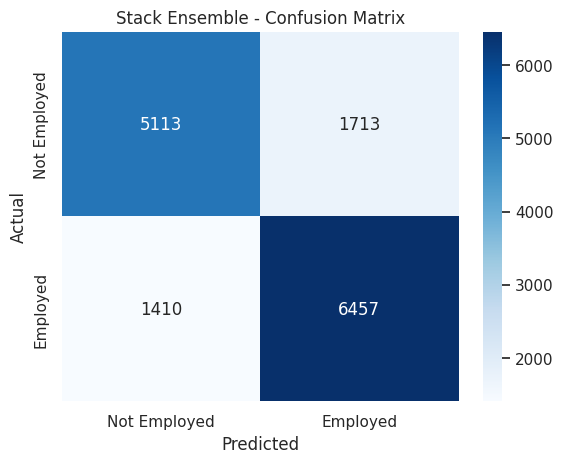

In [86]:
# Plot the confusion matrix
stack_cm = confusion_matrix(y_test, stack_y_pred)
plt.figure()
sns.heatmap(stack_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stack Ensemble - Confusion Matrix')
plt.show()

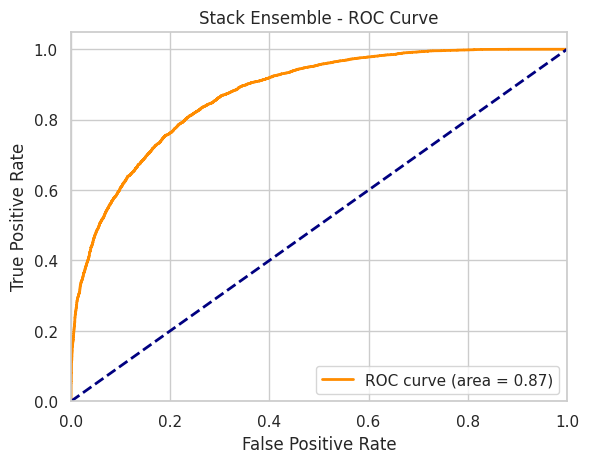

In [87]:
# Plot the ROC curve
plt.figure()
plt.plot(stack_fpr, stack_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {stack_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stack Ensemble - ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Plot the comparison

### Plot the Accuracy for all models

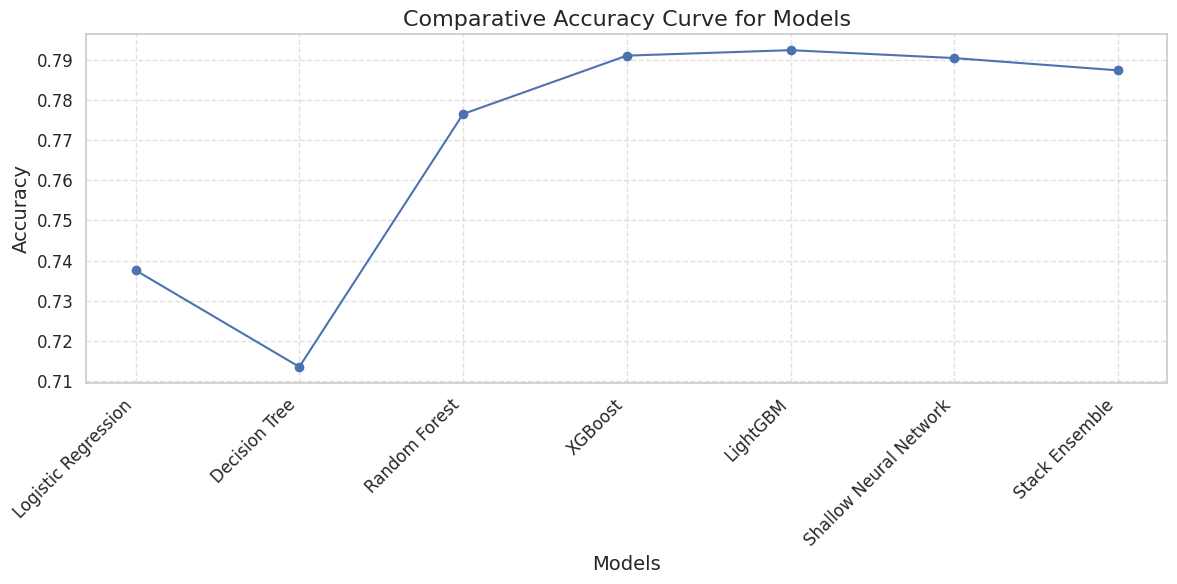

In [88]:
# Accuracy values for each model
accuracy_values = [lr_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, lgbm_accuracy, snn_accuracy, stack_accuracy]

# Model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "Shallow Neural Network", "Stack Ensemble"]  

# Plot the Accuracy values
plt.figure(figsize=(12, 6))  # Increase figure size for better spacing
plt.plot(model_names, accuracy_values, marker='o', linestyle='-')
plt.title('Comparative Accuracy Curve for Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate for better readability
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid with light dashed lines
plt.tight_layout()  # Ensure everything fits within the figure area
plt.show()

### Plot the AUC for all models

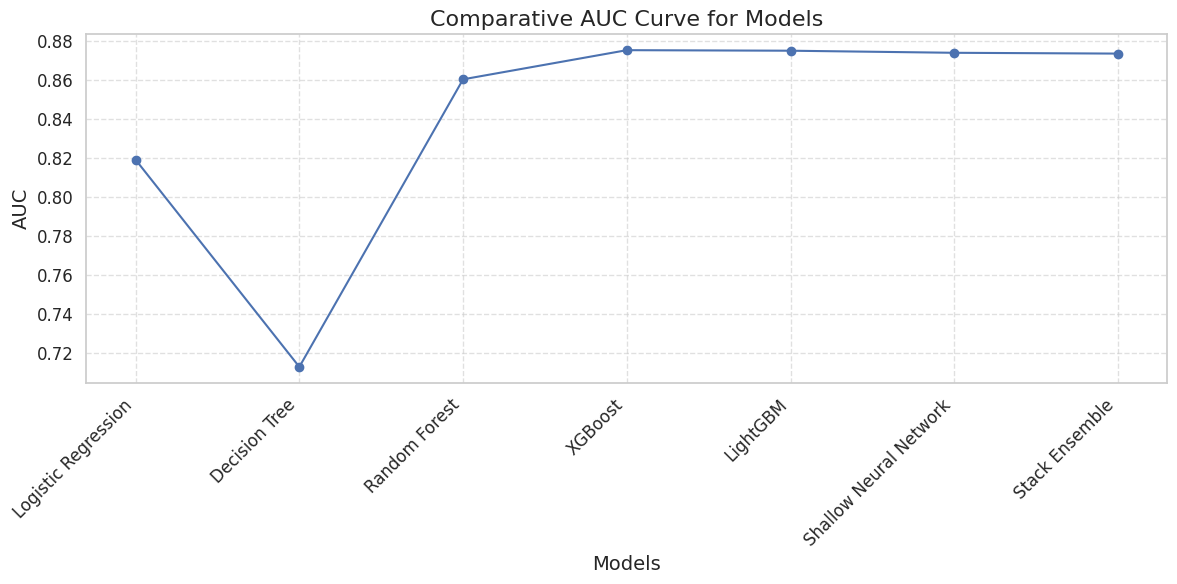

In [89]:
# AUC values for each model
auc_values = [lr_auc, dt_auc, rf_auc, xgb_auc, lgbm_auc, snn_auc, stack_auc]

# Model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "Shallow Neural Network", "Stack Ensemble"]  

# Plot the AUC values
plt.figure(figsize=(12, 6))  # Increase figure size for better spacing
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('AUC', fontsize=14)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate for better readability
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid with light dashed lines
plt.tight_layout()  # Ensure everything fits within the figure area
plt.show()